<a href="https://colab.research.google.com/github/Konakalla-Meghana/64060_skonaka1/blob/main/Assignment1/FML__Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing the necessary libraries

In [1]:
!pip install ucimlrepo
!pip install pandas
!pip install matplotlib


## Loading the data

In [17]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_information = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_information.data.features

# metadata
print(bank_information.metadata)

# variable information
print(bank_information.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# Data (as pandas dataframes)
X = pd.DataFrame(bank_information.data.features)

bank_data = X


In [19]:
bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


## **To know the descriptive statistics for Quantitative and Categorical features present in the dataset**

In [20]:
print("Variables present in the data " ,bank_data.columns)
qualitative_variables = bank_data.select_dtypes(include='object').columns.tolist()
print("Qualitative varibles present in the data ",qualitative_variables)
quantitative_variables = bank_data.select_dtypes(include=['int', 'float']).columns.tolist()
print("Quantitative variables present in the data " ,quantitative_variables)

Variables present in the data  Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')
Qualitative varibles present in the data  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Quantitative variables present in the data  ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']


In [21]:
print("Descriptive statistics of Qualitative variables")
bank_data[qualitative_variables].describe()

Descriptive statistics of Qualitative variables


,job,marital,education,default,housing,loan,contact,month,poutcome
count,44923,45211,43354,45211,45211,45211,32191,45211,8252
unique,11,3,3,2,2,2,2,12,3
top,blue-collar,married,secondary,no,yes,no,cellular,may,failure
freq,9732,27214,23202,44396,25130,37967,29285,13766,4901


In [22]:
print("Descriptive statistics of Quantitative variables")
bank_data[quantitative_variables].describe()

Descriptive statistics of Quantitative variables


,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [23]:
print("\nValue Counts for Categorical Variables:")
print(bank_data["job"].value_counts())
print(bank_data["education"].value_counts())


Value Counts for Categorical Variables:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64
secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64


## Transformation of variable

In [24]:
bank_data["transformed_balance"] = bank_data["balance"] ** 0.5

# Plotting

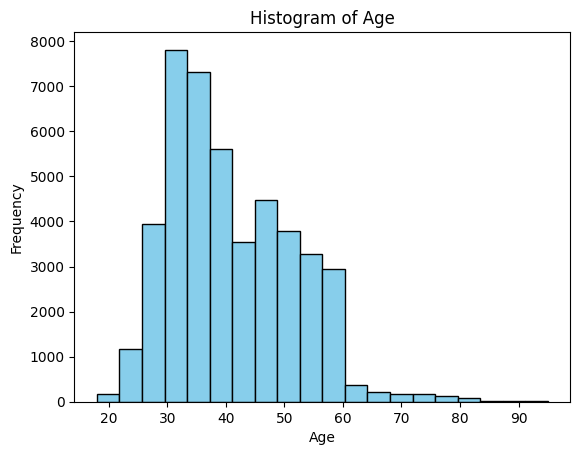

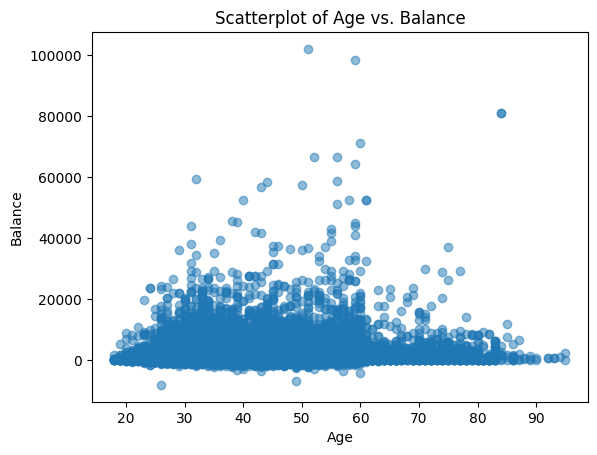

In [16]:
# Plot at least one quantitative variable (e.g., age histogram)
plt.hist(bank_data["age"], bins=20, color="skyblue", edgecolor="black")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Plot a scatterplot (e.g., age vs. balance)
plt.scatter(bank_data["age"], bank_data["balance"], alpha=0.5)
plt.title("Scatterplot of Age vs. Balance")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()